                                                    Case: 

Usando bibliotecas cientificas em Python , crie um validador de CPF, em Jupyter Notebook, valide os números
de 0 a 10_000_000. Otimize seu código e mensure a diferença de velocidade. Tenha em mente o porquê das
suas decisões para a entrevista.

_________________________________________________________________________________________________________________

(Entendimento do problema) 

Entendendo a validação de CPF:

Passo a Passo da validação:

Para validar o CPF é necessário seguir os seguintes passos: 
        
        1. Precisamos calcular o primeiro dígito verificador, e para isso, iremos separar os primeiros 9 dígitos do CPF (xxx.xxx.xxx) e multiplicaremos cada um dos números, da direita para a esquerda por números crescentes a partir do número 2. 
        
        
        
        2. Em seguida somamos todo os valores e usaremos o resultado obtido para dividir por 11. Consideramos como quociente apenas o valor inteiro.
            2.1 Se o resto da divisão for menor que 2, então o dígito é igual a 0 (Zero).
            2.2 Se o resto da divisão for maior ou igual a 2, então o dígito verificador é igual a 11 menos o resto da divisão (11 - resto).
        
        
        
       3. Vamos calcular o segundo digito verificador, porém já utilizando o primeiro digito verificaro. Vamos montar a mesma tabela de multiplicação usada no cálculo do primeiro dígito. Só que desta vez usaremos os valores de 11 até 2 para fazer a multiplicação já que estamos incluindo mais um digito no cálculo(o primeiro dígito calculado).
        Utilizaremos a mesma lógica para o cáclulo do primeiro digito.
        3.1 Se o resto da divisão for menor que 2, então o dígito é igual a 0 (Zero).
        3.2 Se o resto da divisão for maior ou igual a 2, então o dígito verificador é igual a 11 menos o resto da divisão (11 - resto).
        
__________________________________________________________________________________________________________________


Vamos criar algumas funções em python que implementa o algoritmo para validação de cpf, porém utilizando diferentes estratégias para otimização de desempenho.

    1. Validação de CPF Simples:

    Nesta abordagem, o CPF é tratado como uma string.
    Primeiro, convertemos a string do CPF em uma lista de inteiros, mantendo apenas os dígitos.
    Verificamos se o tamanho da lista é igual a 11 (tamanho padrão de um CPF) e se há pelo menos dois dígitos diferentes.
    Calculamos os dígitos verificadores usando a fórmula padrão para validar CPFs.
    Comparamos os dígitos verificadores calculados com os últimos dois dígitos do CPF para determinar se o CPF é válido.
    
    2. Validação de CPF usando Bibliotecas:

    Nesta abordagem, também tratamos o CPF como uma string.
    Convertemos a string do CPF em uma lista de inteiros, mantendo apenas os dígitos.
    Utilizamos funções da biblioteca NumPy para realizar operações matemáticas eficientes.
    Os passos de validação são semelhantes à abordagem simples, onde calculamos os dígitos verificadores e os comparamos com os últimos dois dígitos do CPF.
    
    3. Validação de CPF em Paralelo:

    Nesta abordagem, aproveitamos o paralelismo para validar múltiplos CPFs ao mesmo tempo.
    Usamos a mesma lógica de validação da abordagem com bibliotecas, mas dividimos o trabalho entre múltiplos processos (paralelização).
    Cada processo executa a validação de um subconjunto dos CPFs, e os resultados são combinados no final.
    
    4. Validação de CPF usando Estrutura de Dados Eficiente:

    Nesta abordagem, utilizamos uma estrutura de conjunto (set) para validar o CPF de forma eficiente.
    Convertendo a string do CPF em um conjunto, garantimos que não haja dígitos repetidos e verificamos se o tamanho do conjunto é igual a 11.
    Em seguida, realizamos os mesmos cálculos para obter os dígitos verificadores e comparamos o conjunto resultante com o conjunto dos dígitos do CPF.

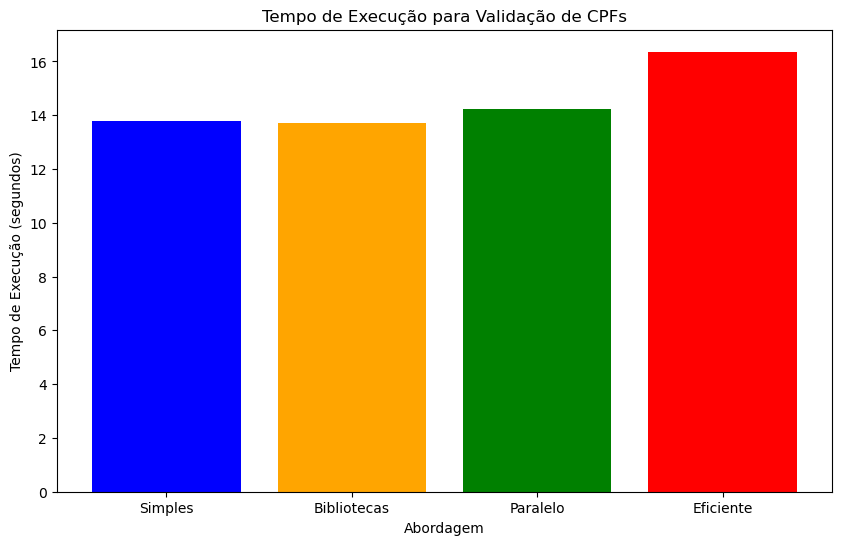

In [32]:
import numpy as np
import time
import matplotlib.pyplot as plt
from multiprocessing import Pool

# Função de validação de CPF simples
def validate_cpf_simple(cpf):
    cpf = [int(d) for d in str(cpf) if d.isdigit()]
    if len(cpf) != 11 or len(set(cpf)) == 1:
        return False
    cpf_partial = cpf[:9]
    sum_ = sum(x * y for x, y in zip(cpf_partial, range(10, 1, -1)))
    remainder = 11 - (sum_ % 11)
    if remainder > 9:
        check_digit = 0
    else:
        check_digit = remainder
    cpf_partial.append(check_digit)
    sum_ = sum(x * y for x, y in zip(cpf_partial, range(11, 1, -1)))
    remainder = 11 - (sum_ % 11)
    if remainder > 9:
        check_digit = 0
    else:
        check_digit = remainder
    cpf_partial.append(check_digit)
    return cpf[-2:] == cpf_partial[-2:]



# Função de validação de CPF usando bibliotecas
def validate_cpf_library(cpf):
    cpf = [int(d) for d in str(cpf) if d.isdigit()]
    if len(cpf) != 11 or len(set(cpf)) == 1:
        return False
    cpf_partial = cpf[:9]
    sum_ = np.sum(np.array(cpf_partial) * np.array(range(10, 1, -1)))
    remainder = 11 - (sum_ % 11)
    check_digit1 = 0 if remainder > 9 else remainder
    cpf_partial.append(check_digit1)
    sum_ = np.sum(np.array(cpf_partial) * np.array(range(11, 1, -1)))
    remainder = 11 - (sum_ % 11)
    check_digit2 = 0 if remainder > 9 else remainder
    cpf_partial.append(check_digit2)
    return cpf[-2:] == cpf_partial[-2:]

# Função de validação de CPF em paralelo
def validate_cpf_parallel(cpf):
    return validate_cpf_library(cpf)

# Função de validação de CPF usando estrutura de dados eficiente
def validate_cpf_efficient(cpf):
    cpf = set(int(d) for d in str(cpf) if d.isdigit())
    if len(cpf) != 11 or len(cpf) == 1:
        return False
    cpf_partial = list(cpf)[:9]
    sum_ = sum(x * y for x, y in zip(cpf_partial, range(10, 1, -1)))
    remainder = 11 - (sum_ % 11)
    check_digit1 = 0 if remainder > 9 else remainder
    cpf_partial.append(check_digit1)
    sum_ = sum(x * y for x, y in zip(cpf_partial, range(11, 1, -1)))
    remainder = 11 - (sum_ % 11)
    check_digit2 = 0 if remainder > 9 else remainder
    cpf_partial.append(check_digit2)
    return cpf == set(cpf_partial)

# Gerando lista de CPFs de 0 a 10 milhões
cpf_list = np.arange(10_000_000)

# Medindo o tempo de execução para cada abordagem
start_time_simple = time.time()
validity_simple = np.array([validate_cpf_simple(cpf) for cpf in cpf_list])
end_time_simple = time.time()
execution_time_simple = end_time_simple - start_time_simple

start_time_library = time.time()
validity_library = np.array([validate_cpf_library(cpf) for cpf in cpf_list])
end_time_library = time.time()
execution_time_library = end_time_library - start_time_library

start_time_parallel = time.time()
with Pool() as pool:
    validity_parallel = np.array(pool.map(validate_cpf_parallel, cpf_list))
end_time_parallel = time.time()
execution_time_parallel = end_time_parallel - start_time_parallel

start_time_efficient = time.time()
validity_efficient = np.array([validate_cpf_efficient(cpf) for cpf in cpf_list])
end_time_efficient = time.time()
execution_time_efficient = end_time_efficient - start_time_efficient

# Gerando o gráfico de comparação
labels = ['Simples', 'Bibliotecas', 'Paralelo', 'Eficiente']
times = [execution_time_simple, execution_time_library, execution_time_parallel, execution_time_efficient]

plt.figure(figsize=(10, 6))
plt.bar(labels, times, color=['blue', 'orange', 'green', 'red'])
plt.title('Tempo de Execução para Validação de CPFs')
plt.xlabel('Abordagem')
plt.ylabel('Tempo de Execução (segundos)')
plt.show()

Vamos fazer uma análise de escalabilidade analisando o comportamento de cada função para validar de 0 até 100_000, depois até 500_000 e assim sucessivamente até 10_000_000.

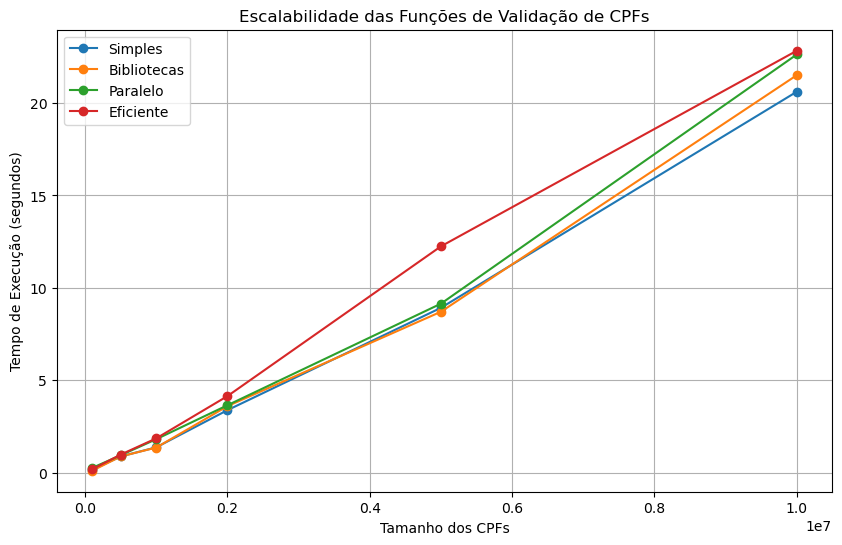

In [18]:
# Gerar conjuntos de CPFs com tamanhos crescentes
cpf_sizes = [100_000, 500_000, 1_000_000, 2_000_000, 5_000_000, 10_000_000]
results_simple = []
results_library = []
results_parallel = []
results_efficient = []

# Executar validação para cada tamanho de CPFs
for size in cpf_sizes:
    cpf_list = np.arange(size)
    
    # Medir o tempo de execução para a função de validação simples
    start_time = time.time()
    validity_simple = np.array([validate_cpf_simple(cpf) for cpf in cpf_list])
    end_time = time.time()
    execution_time_simple = end_time - start_time
    results_simple.append(execution_time_simple)
    
    # Medir o tempo de execução para a função de validação usando bibliotecas
    start_time = time.time()
    validity_library = np.array([validate_cpf_library(cpf) for cpf in cpf_list])
    end_time = time.time()
    execution_time_library = end_time - start_time
    results_library.append(execution_time_library)
    
    # Medir o tempo de execução para a função de validação em paralelo
    start_time = time.time()
    with Pool() as pool:
        validity_parallel = np.array(pool.map(validate_cpf_parallel, cpf_list))
    end_time = time.time()
    execution_time_parallel = end_time - start_time
    results_parallel.append(execution_time_parallel)
    
    # Medir o tempo de execução para a função de validação usando estrutura de dados eficiente
    start_time = time.time()
    validity_efficient = np.array([validate_cpf_efficient(cpf) for cpf in cpf_list])
    end_time = time.time()
    execution_time_efficient = end_time - start_time
    results_efficient.append(execution_time_efficient)

# Gerando o gráfico de escalabilidade para cada função de validação de CPFs
plt.figure(figsize=(10, 6))

plt.plot(cpf_sizes, results_simple, label='Simples', marker='o', linestyle='-')
plt.plot(cpf_sizes, results_library, label='Bibliotecas', marker='o', linestyle='-')
plt.plot(cpf_sizes, results_parallel, label='Paralelo', marker='o', linestyle='-')
plt.plot(cpf_sizes, results_efficient, label='Eficiente', marker='o', linestyle='-')

plt.title('Escalabilidade das Funções de Validação de CPFs')
plt.xlabel('Tamanho dos CPFs')
plt.ylabel('Tempo de Execução (segundos)')
plt.legend()
plt.grid(True)
plt.show()

Note que através dessa abordagem de fazer a verificação de cpf validando números de 0 até 10_000_000 não conseguimos avaliar de forma precisa a eficiência de cada função. Assim sendo, feita essa abordagem de fazer a validação de 0 até 10_000_000 vamos partir para uma avaliação de possíveis valores reais de CPFs. 

# Análise com possíveis CPFs válidos

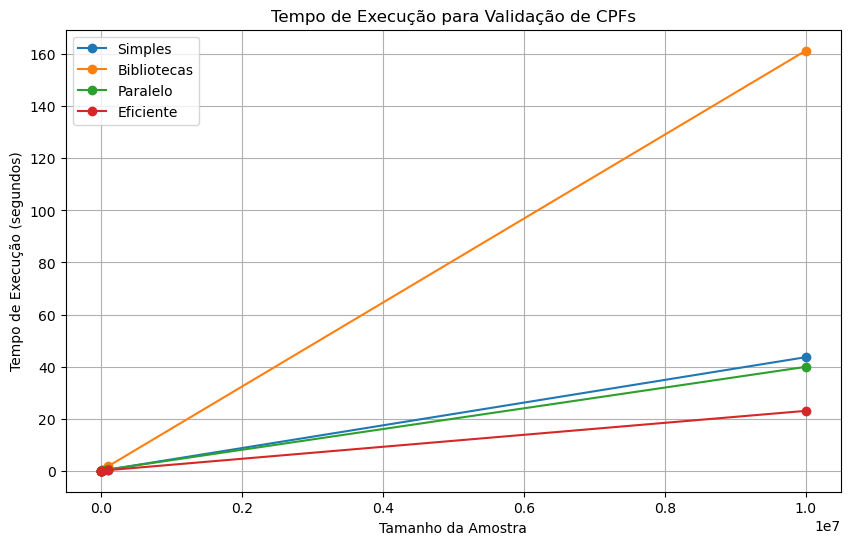

In [30]:
# Função para gerar uma amostra de CPFs para cada abordagem
def generate_cpf_sample(size):
    return np.random.randint(10000000000, 99999999999, size=size)


# Tamanhos das amostras
sample_sizes = [0 , 100, 1000, 10000, 100000, 10_000_000]

# Medindo o tempo de execução para cada abordagem
execution_times_simple = []
execution_times_library = []
execution_times_parallel = []
execution_times_efficient = []

for size in sample_sizes:
    cpf_sample = generate_cpf_sample(size)
    
    start_time = time.time()
    validity_simple = np.array([validate_cpf_simple(cpf) for cpf in cpf_sample])
    end_time = time.time()
    execution_times_simple.append(end_time - start_time)
    
    start_time = time.time()
    validity_library = np.array([validate_cpf_library(cpf) for cpf in cpf_sample])
    end_time = time.time()
    execution_times_library.append(end_time - start_time)
    
    start_time = time.time()
    with Pool() as pool:
        validity_parallel = np.array(pool.map(validate_cpf_parallel, cpf_sample))
    end_time = time.time()
    execution_times_parallel.append(end_time - start_time)
    
    start_time = time.time()
    validity_efficient = np.array([validate_cpf_efficient(cpf) for cpf in cpf_sample])
    end_time = time.time()
    execution_times_efficient.append(end_time - start_time)

# Gerando o gráfico de comparação
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, execution_times_simple, label='Simples', marker='o', linestyle='-')
plt.plot(sample_sizes, execution_times_library, label='Bibliotecas', marker='o', linestyle='-')
plt.plot(sample_sizes, execution_times_parallel, label='Paralelo', marker='o', linestyle='-')
plt.plot(sample_sizes, execution_times_efficient, label='Eficiente', marker='o', linestyle='-')

plt.title('Tempo de Execução para Validação de CPFs')
plt.xlabel('Tamanho da Amostra')
plt.ylabel('Tempo de Execução (segundos)')
plt.legend()
plt.grid(True)
plt.show()

Logo, através dessa análise a apartir de possível CPFs reais conseguimos avaliar melhor o desempenho de cada função implementada. Conseguimos avaliar o tempo de execução para amostras de 0, , 100, 1000, 10000, 100000 até 10_000_000 de possíveis CPFs válidos. 

Note que a função utilizando algumas estruturas de dados mostrou-se mais eficiente e estável.